## Przykład wykorzystania wzorca fasada w Pythonie

### `requests.get()` - uproszczony interfejs HTTP
**Lokalizacja**: `requests/api.py`, funkcja `get()`  

In [1]:
import requests

# Facade: prosty interfejs
response = requests.get('https://httpbin.org/json')
print(f"Status: {response.status_code}")
print(f"Content type: {response.headers.get('content-type')}")


Status: 200
Content type: application/json


Co kryje się pod fasadą ?

In [2]:
import inspect

print("\nImplementacja requests.get():\n")
source_lines = inspect.getsource(requests.get).split('\\n')
for i, line in enumerate(source_lines):
    print(line)


Implementacja requests.get():

def get(url, params=None, **kwargs):
    r"""Sends a GET request.

    :param url: URL for the new :class:`Request` object.
    :param params: (optional) Dictionary, list of tuples or bytes to send
        in the query string for the :class:`Request`.
    :param \*\*kwargs: Optional arguments that ``request`` takes.
    :return: :class:`Response <Response>` object
    :rtype: requests.Response
    """

    return request("get", url, params=params, **kwargs)



A dokładniej?

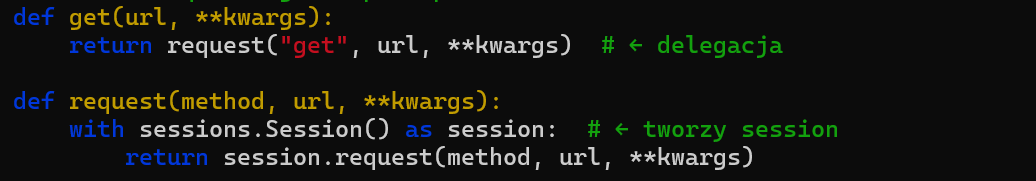

Klasa Session, ma wiele metod i konfiguracji. `request.get` tworzy tymczasową sesję z domyślnymi ustawieniami. 

In [3]:
session = requests.Session()
session_methods = [m for m in dir(session) if not m.startswith('_')]
print(f"\nSession ma {len(session_methods)} publicznych metod/atrybutów:\n")
print("Pierwsze 15:", session_methods[:15])


Session ma 32 publicznych metod/atrybutów:

Pierwsze 15: ['adapters', 'auth', 'cert', 'close', 'cookies', 'delete', 'get', 'get_adapter', 'get_redirect_target', 'head', 'headers', 'hooks', 'max_redirects', 'merge_environment_settings', 'mount']


Na szczęście nie musimy się tym zajmować, ponieważ biblioteka `requests` wystawia fasadę na najpopularniejsze funkcje.

**Mapowanie na język wzorca**:
- **Facade**: funkcje `requests.get()`, `requests.post()`, `requests.put()`
- **Complex Subsystem**: `Session`, `adapters`, `auth`, `cookies`, `redirects`, `SSL verification`
- **Subsystem Classes**: `Session`, `HTTPAdapter`, `PreparedRequest`, `Response`
- **Simple Interface**: `requests.get(url, params=None, **kwargs)`
- **Hidden Complexity**: automatyczna obsługa cookies, redirects, SSL, encodings

**Dlaczego to Facade?**
- Ukrywa złożoność HTTP client (Session + adaptery + auth + cookies)
- Zapewnia prosty interfejs dla częstych operacji
- Używa domyślnej sesji z sensownymi ustawieniami
- Klient nie musi znać wewnętrznej architektury

**Praktyczne znaczenie**:
Umożliwia wykonywanie żądań HTTP jedną linią kodu zamiast ręcznej konfiguracji sesji, adapterów i middleware.